<center><img src="https://github.com/insaid2018/Term-1/blob/master/Images/INSAID_Full%20Logo.png?raw=true" width="240" height="100" /></center>

**<center><h3>Time Series Assignment Solution</h3></center>**

---
# **Table of Contents**
---

**1.** [**Problem Statement**](#Section1)<br>
**2.** [**Objective**](#Section2)<br>
**3.** [**Installing & Importing Libraries**](#Section3)<br>
  - **3.1** [**Installing Libraries**](#Section31)
  - **3.2** [**Upgrading Libraries**](#Section32)
  - **3.3** [**Importing Libraries**](#Section33)

**4.** [**Data Acquisition & Description**](#Section4)<br>
  - **4.1** [**Data Description**](#Section41)

**5.** [**Data Pre-processing**](#Section5)<br>
  - **5.1** [**Identification & Handling of Missing Data**](#Section51)<br>
  - **5.2** [**Identification & Handling of Redundant Data**](#Section52)<br>
  - **5.3** [**Identification & Handling of Inconsistent Data Types**](#Section53)<br>

**6.** [**Time Series Analysis**](#Section6)<br>
**7.** [**Time Series Forecasting**](#Section7)<br>




---
<a name = Section1></a>
# **1. Problem Statement**
---

- In late 2010, Onion prices shot through the roof and cause grave crisis.

- This was caused by lack of rainfall in major onion producing region such as Maharashtra and Karnataka.

- The crisis has led political tension and large scale hoarding by the traders in the country.

- Former Prime Minister Manmohan Singh described it as "a grave concern".

- **Further Information**:
  - BBC Article in Dec 2010 - [**Stink over onion crisis is enough to make you cry**](http://www.bbc.co.uk/blogs/thereporters/soutikbiswas/2010/12/indias_onion_crisis.html)

  - Hindu OpEd in Dec 2010 - [**The political price of onions**](http://www.thehindu.com/opinion/editorial/article977100.ece)

---
<a name = Section2></a>
# **2. Objective**
---

- The objective of this assignment is to predict the price of onion in Bangalore using ARIMA.

---
<a name = Section3></a>
# **3. Installing & Importing Libraries**
---

<a name = Section31></a>
### **3.1 Installing Libraries**

In [ ]:
!pip install -q datascience                                         # Package that is required by pandas profiling
!pip install -q pandas-profiling                                    # Library to generate basic statistics about data

     |████████████████████████████████| 71kB 4.7MB/s 


<a name = Section32></a>
### **3.2 Upgrading Libraries**

- **After upgrading** the libraries, you need to **restart the runtime** to make the libraries in sync. 

- Make sure not to execute the cell above (3.1) and below (3.2) again after restarting the runtime.

In [ ]:
!pip install -q --upgrade pandas-profiling
!pip install -q --upgrade statsmodels 

<a name = Section33></a>
### **3.3 Importing Libraries**

In [ ]:
#-------------------------------------------------------------------------------------------------------------------------------
import pandas as pd
pd.set_option('display.max_columns', None)                          # Unfolding hidden features if the cardinality is high      
pd.set_option('display.max_colwidth', None)                         # Unfolding the max feature width for better clearity      
pd.set_option('display.max_rows', None)                             # Unfolding hidden data points if the cardinality is high
pd.set_option('mode.chained_assignment', None)                      # Removing restriction over chained assignments operations
pd.set_option('display.float_format', lambda x: '%.5f' % x)         # To suppress scientific notation over exponential values
#-------------------------------------------------------------------------------------------------------------------------------
import numpy as np                                                  # Importing package numpys (For Numerical Python)
#-------------------------------------------------------------------------------------------------------------------------------
from datetime import datetime                                       # Importing datetime for datetime manipulation
#-------------------------------------------------------------------------------------------------------------------------------
import matplotlib.pyplot as plt                                     # Importing pyplot interface using matplotlib
from matplotlib.pylab import rcParams                               # Backend used for rendering and GUI integration                                               
import seaborn as sns                                               # Importin seaborm library for interactive visualization
%matplotlib inline
#-------------------------------------------------------------------------------------------------------------------------------
from statsmodels.tsa.seasonal import seasonal_decompose             # Seasonal decomposition using moving averages
from statsmodels.tsa.stattools import adfuller                      # Augmented Dickey-Fuller unit root test
from statsmodels.tsa.stattools import acf, pacf                     # Importing Autocorrelation and Partial Autocorrelation
from statsmodels.graphics.tsaplots import plot_acf                  # To plot Autocorrelation Function
from statsmodels.graphics.tsaplots import plot_pacf                 # To plot Partial Autocorrelation Function
#-------------------------------------------------------------------------------------------------------------------------------
from statsmodels.tsa.arima.model import ARIMA
#-------------------------------------------------------------------------------------------------------------------------------
import warnings                                                     # Importing warning to disable runtime warnings
warnings.filterwarnings("ignore")                                   # Warnings will appear only once

---
<a name = Section4></a>
# **4. Data Acquisition & Description**
---

- The data set is based on the amount of onions sold (1996-01, 2016-12) and it can be retrieved from the attached <a href = "https://raw.githubusercontent.com/insaid2018/Term-3/master/Data/Assignment/MonthWiseMarketArrivals_Clean.csv">**link**</a>.

| Records | Features | Dataset Size |
| :-- | :-- | :-- |
| 10227 | 10 | 658 KB| 

|Id|Feature|Description|
|:--|:--|:--|
|01|**market**|The place where onions are sold.|
|02|**month**|Month on which onions were sold.|
|03|**year**|Year on which onions were sold.|
|04|**quantity**|Quantity of onions sold.|
|05|**priceMin**|Minimum prices of Onions.|
|06|**priceMax**|Maximum prices of Onions.|
|07|**priceMod**|Price Mode of Onions.|
|08|**state**|The name of the state where onions were sold.|
|09|**city**|The name of the city where onions were sold.|
|10|**date**|Date on which onions were sold.|


In [ ]:
data = pd.read_csv('https://raw.githubusercontent.com/insaid2018/Term-3/master/Data/Assignment/MonthWiseMarketArrivals_Clean.csv')
print('Data Shape:', data.shape)
data.head()

Data Shape: (10227, 10)


,market,month,year,quantity,priceMin,priceMax,priceMod,state,city,date
0,ABOHAR(PB),January,2005,2350,404,493,446,PB,ABOHAR,January-2005
1,ABOHAR(PB),January,2006,900,487,638,563,PB,ABOHAR,January-2006
2,ABOHAR(PB),January,2010,790,1283,1592,1460,PB,ABOHAR,January-2010
3,ABOHAR(PB),January,2011,245,3067,3750,3433,PB,ABOHAR,January-2011
4,ABOHAR(PB),January,2012,1035,523,686,605,PB,ABOHAR,January-2012


<a name = Section41></a>
### **4.1 Data Description**

- In this section we will get **information about the data** and see some observations.

In [ ]:
print('Described Column Length:', len(data.describe().columns))
data.describe().transpose()

Described Column Length: 5


,count,mean,std,min,25%,50%,75%,max
year,10227.00000,2009.02229,4.37284,1996.00000,2006.00000,2009.00000,2013.00000,2016.00000
quantity,10227.00000,76604.88002,124408.69876,20.00000,8898.00000,27460.00000,88356.50000,1639032.00000
priceMin,10227.00000,646.94436,673.12185,16.00000,209.00000,440.00000,828.00000,6000.00000
priceMax,10227.00000,1212.76073,979.65887,145.00000,557.00000,923.00000,1527.00000,8192.00000
priceMod,10227.00000,984.28435,818.47150,80.00000,448.00000,747.00000,1248.00000,6400.00000


<a name = Section5></a>

---
# **5. Data Pre-Processing**
---

<a name = Section51></a>
### **5.1 Identification & Handling of Missing Data**

In [ ]:
missing_frame = pd.DataFrame(index = data.columns.values)
missing_frame['Null Frequency'] = data.isnull().sum().values
nullpercent = data.isnull().sum().values/data.shape[0]
missing_frame['Missing Null %age'] = np.round(nullpercent, decimals = 4) * 100
missing_frame['Zero Frequency'] = data[data == 0].count().values
zero_percent = data[data == 0].count().values / data.shape[0]
missing_frame['Missing %age'] = np.round(zero_percent, decimals = 4) * 100
missing_frame.transpose()

,market,month,year,quantity,priceMin,priceMax,priceMod,state,city,date
Null Frequency,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
Missing Null %age,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
Zero Frequency,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
Missing %age,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000


<a name = Section52></a>
### **5.2 Identification & Handling of Redundant Data**

- In this section **we will identify redundant rows and columns** in our data if present.

- For handling duplicate features we have created a custom function to identify duplicacy in features with different name but similar values:

In [ ]:
def duplicate_cols(dataframe):
  ls1 = []
  ls2 = []

  columns = dataframe.columns.values
  for i in range(0, len(columns)):
    for j in range(i+1, len(columns)):
      if (np.where(dataframe[columns[i]] == dataframe[columns[j]], True, False).all() == True):
        ls1.append(columns[i])
        ls2.append(columns[j])

  if ((len(ls1) == 0) & (len(ls2) == 0)):
    return None
  else:
    duplicate_frame = pd.DataFrame()
    duplicate_frame['Feature 1'] = ls1
    duplicate_frame['Feature 2'] = ls2
    return duplicate_frame

In [ ]:
print('Contains Redundant Records?:', data.duplicated().any())
print('Duplicate Count:', data.duplicated().sum())
print('-----------------------------------------------------------------------')
print('Contains Redundant Features?:', duplicate_cols(data))

Contains Redundant Records?: False
Duplicate Count: 0
-----------------------------------------------------------------------
Contains Redundant Features?: None


<a name = Section53></a>
### **5.3 Identification & Handling of Inconsistent Data Types**

- In this section we will **identify** and **handle** the **feature** that may **contains inconsistent data type**.

**Before Identification & Handling of Inconsistent Data Types**

In [ ]:
data.head(2)

,market,month,year,quantity,priceMin,priceMax,priceMod,state,city,date
0,ABOHAR(PB),January,2005,2350,404,493,446,PB,ABOHAR,January-2005
1,ABOHAR(PB),January,2006,900,487,638,563,PB,ABOHAR,January-2006


In [ ]:
type_frame = pd.DataFrame(data = data.dtypes, columns = ['Type'])
type_frame.transpose()

,market,month,year,quantity,priceMin,priceMax,priceMod,state,city,date
Type,object,object,int64,int64,int64,int64,int64,object,object,object


**Observation:**

- **Feature:** [ Current Data Type &rarr; Required Data Type ]
- **date:** [ Object  &rarr; Datetime ]

**Performing Operations**

In [ ]:
data['date']  =  pd.to_datetime(data['date'], infer_datetime_format = True) 
print('Success!')

Success!


**After Identification & Handling of Inconsistent Data Types**

In [ ]:
type_frame = pd.DataFrame(data = data.dtypes, columns = ['Type'])
type_frame.transpose()

,market,month,year,quantity,priceMin,priceMax,priceMod,state,city,date
Type,object,object,int64,int64,int64,int64,int64,object,object,datetime64[ns]


**Observation:**

- We have successfully handeled inconsistent data types.

<a name = Section6></a>

---
# **6. Time Series Analysis**
---

- Time series deals with two columns, i.e. temporal (predictor) and forecast (prediction).

  - **Temporal:** The time which in our case is **year**.

  - **Forecast:** The price of onions i.e. **priceMod**.

In [ ]:
def plot_trend():
  fig = plt.figure(figsize = [15, 7])
  sns.lineplot(x = 'date', y = 'priceMod', data = data, ci = None)
  plt.xlabel('Date', size = 14)
  plt.ylabel('Price of Onions', size = 14)
  plt.title('Trend in Price of Onions (1996 - 2016)', size = 16)
  plt.show()

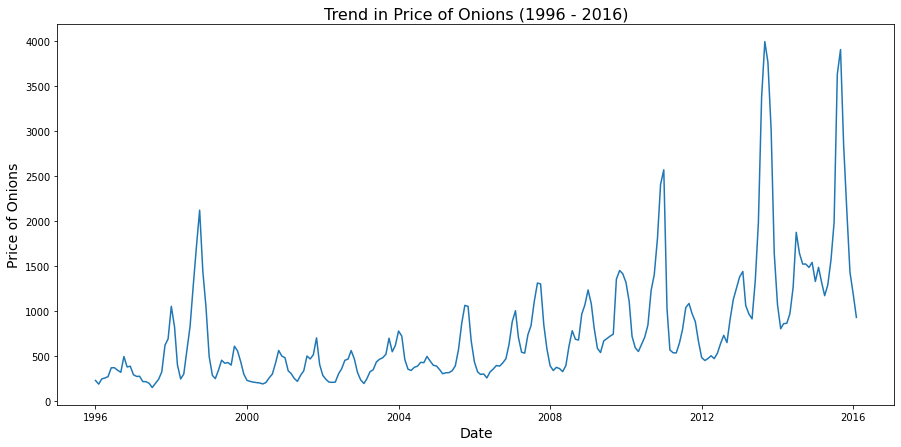

In [ ]:
plot_trend()

- Before going further, let's set date as our index which in result will simplify our work while performing analysis.

In [ ]:
indexed_data =  data.set_index(['date'])
print('Success!')

Success!


In [ ]:
indexed_data.head()

,market,month,year,quantity,priceMin,priceMax,priceMod,state,city
date,,,,,,,,,
2005-01-01,ABOHAR(PB),January,2005,2350,404,493,446,PB,ABOHAR
2006-01-01,ABOHAR(PB),January,2006,900,487,638,563,PB,ABOHAR
2010-01-01,ABOHAR(PB),January,2010,790,1283,1592,1460,PB,ABOHAR
2011-01-01,ABOHAR(PB),January,2011,245,3067,3750,3433,PB,ABOHAR
2012-01-01,ABOHAR(PB),January,2012,1035,523,686,605,PB,ABOHAR


---
**<h4>Question 1:** Plot the trend and distribution of priceMod by using following instructions:</h4>

---

- Create a new dataframe named as indexed_data_BANGLORE which will contain data related to Banglore city only.

- Remove features - market,	month, year, priceMin, priceMax, state, city, quantity.

- Sort the dataframe index using sort index function.

In [ ]:
def index_frame():
  # Filtering the data realted to BANGLORE city only
  indexed_data_BANGLORE = indexed_data.loc[indexed_data['city'] == 'BANGALORE']

  # Dropping the asked features from the new dataframe
  indexed_data_BANGLORE.drop(['market', 'month', 'year', 'priceMin', 'priceMax', 'state', 'city', 'quantity'], axis = 1, inplace = True)

  # Sorting Index
  indexed_data_BANGLORE = indexed_data_BANGLORE.sort_index(ascending = True)
  return indexed_data_BANGLORE

In [ ]:
indexed_data_BANGLORE = index_frame()
indexed_data_BANGLORE.head()

- Create a function to plot the trend and distribution of onion prices side by side.

In [ ]:
def trend_dist():
  # Creating a figure instance
  fig = plt.figure(figsize = [20, 7])

  # Creating first subplot
  plt.subplot(1, 2, 1)
  sns.lineplot(x = indexed_data_BANGLORE.index, y = 'priceMod', data = indexed_data_BANGLORE, ci = None, color = 'purple')
  plt.xlabel('Date', size = 14)
  plt.ylabel('Price of Onions', size = 14)
  plt.title('Trend in Prices of Onions (1996 - 2016)', size = 16)

  # Creating second subplot
  plt.subplot(1, 2, 2)
  sns.distplot(a = indexed_data_BANGLORE['priceMod'], color = 'purple')
  plt.xlabel('Price', size = 14)
  plt.ylabel('Probability density', size = 14)
  plt.title('Distribution of Prices of Onions (1996 - 2016)', size = 16)

  plt.show()

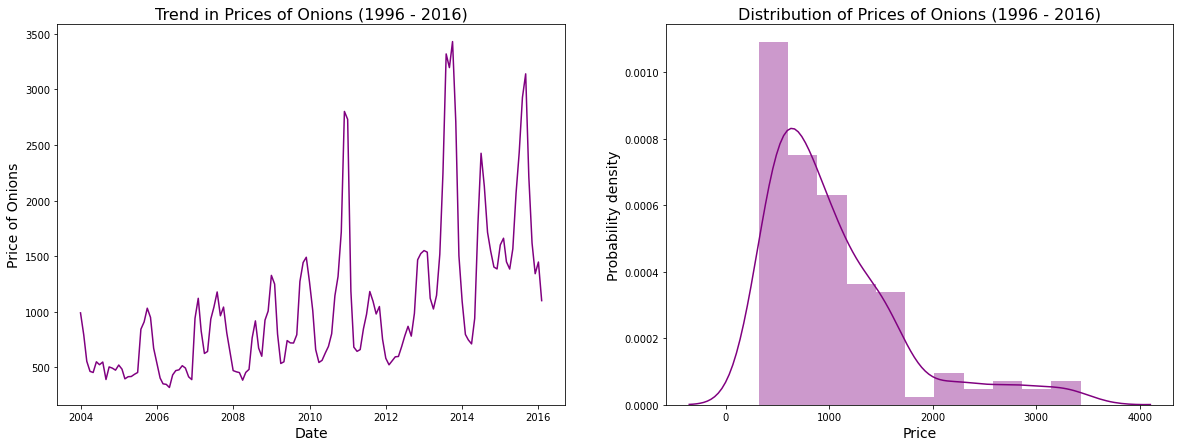

In [ ]:
trend_dist()

---
**<h4>Question 2:** Generate all seasonal components of time series by performing seasonal decomposition.</h4>

---

- Use seasonal_decompose() function present in statsmodel over indexed_data_BANGLORE created earlier.

In [ ]:
def seasonalDecompose():
  # Set figsize of 15 X 7 inches
  rcParams['figure.figsize']  =  [15, 7]

  # Decomposed data into respective components: Observed, Trend, Seasonal and Residual
  seasonal_decompose(indexed_data_BANGLORE).plot()
  plt.xlabel('Date', size = 14)
  plt.show()

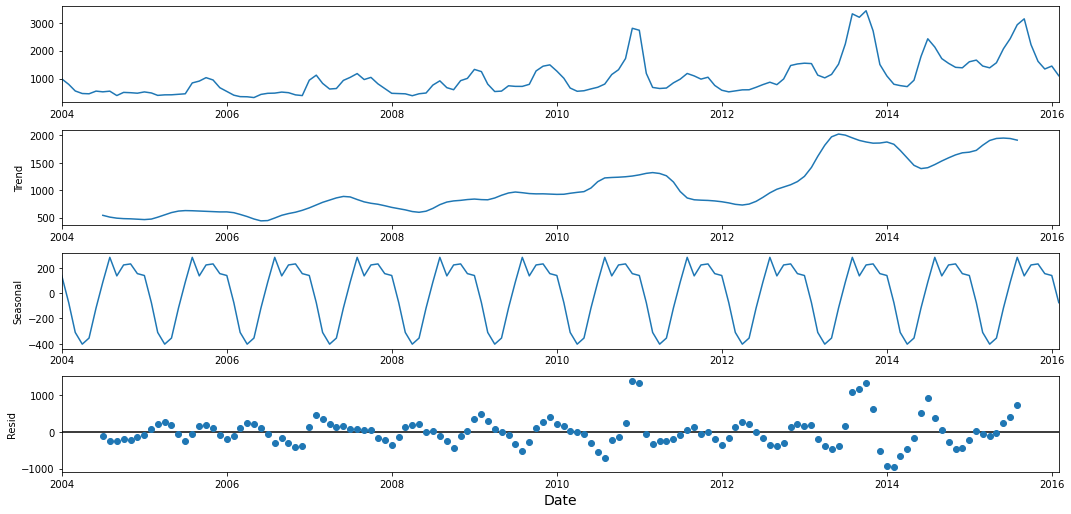

In [ ]:
seasonalDecompose()

---
**<h4>Question 3:** Create a function named as <ins>rolling_means</ins> to estimated Rolling Statistics by using following instructions.

---

- Calculate rolling mean using rolling window of size 12 and store in a roll_mean variable.

- Calculate rolling std using rolling window of size 12 and store in a roll_std variable.

- Create line plots for original data (Banglore), rolling mean and rolling standard deviation.


In [ ]:
def rolling_means(data, feature, title_add = ''):

  # Average rolling mean over 12 months over the entire data set
  roll_mean = data.rolling(window = 12).mean()

  # Plotting Rolling Statistics over Observed Data
  roll_std = data.rolling(window = 12).std()

  sns.lineplot(x = data.index, y = feature, data = data)
  sns.lineplot(x = roll_mean.index, y = feature, data = roll_mean)
  sns.lineplot(x = roll_std.index, y = feature, data = roll_std)

  plt.legend(labels = ['Observed', 'Rolling Mean', 'Rolling Std'], loc = 'best', prop = {'size': 14})
  plt.xlabel(xlabel = 'Date', size = 14)
  plt.ylabel('Prices of Onions', size = 14)
  plt.title('Rolling Statistics (μ & σ)' + title_add, size = 16)

---
**<h4>Question 4:** Create a function named as <ins>ADFTest</ins> to estimate Augmented Dickey–Fuller test by using following instructions.

---

- Calculate an object of adfuller function by passing data column and setting autolag as AIC.

- Create a dataframe that explain all the metrics out of the adfuller object.

- Return the dataframe object.

In [ ]:
def ADFTest(data, feature, test_label = 'Original'):

  # Saved test results from adfuller function
  dftest = adfuller(data[feature], autolag = 'AIC')

  # Extracted respective values from the saved test results
  df_dict = {'ADF_Test_Statistics': dftest[0], 'p-value': dftest[1], 'Used_Lags': dftest[2], 
              'Number_Of_Observations': dftest[3], 'Critical_Value (1%)': dftest[4]['1%'],
            'Critical_Value (5%)': dftest[4]['5%'], 'Critical_Value (10%)': dftest[4]['10%']}

  # Created dataframe out of the dictionary
  dfoutput = pd.DataFrame(data = df_dict, index = [test_label])

  return dfoutput

---
**<h4>Question 5:** Check the stationarity of priceMod feature by calling rolling_means() and ADFTest() function.

---

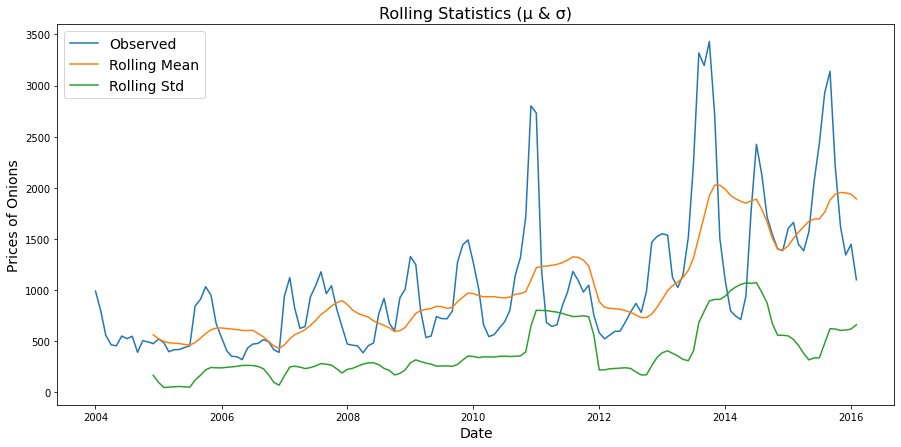

In [ ]:
# Plotting Rolling Statistics over Observed Data
figure = plt.figure(figsize = [15, 7])

# Called the function
rolling_means(indexed_data_BANGLORE, feature = 'priceMod')

# Plot the Visual
plt.show()

In [ ]:
ADFTest(indexed_data_BANGLORE, feature = 'priceMod')

,ADF_Test_Statistics,p-value,Used_Lags,Number_Of_Observations,Critical_Value (1%),Critical_Value (5%),Critical_Value (10%)
Original,-4.00440,0.00139,2,143,-3.47693,-2.88197,-2.57767


---

**<h4>Question 6:** Perform log transformation over priceMod feature and plot the trend as well as distribution.

---

- Create a log_indexed_data variable by applying log transformation on indexed_data_BANGLORE dataframe.

In [ ]:
def createFeature():
  log_indexed_data = np.log(indexed_data_BANGLORE)
  return log_indexed_data

In [ ]:
log_indexed_data = createFeature()

- Create a function that displays trend as well the distribution of the onion prices.

In [ ]:
def trend_dist():
  # Plotting trend and distribution using subplots

  fig = plt.figure(figsize = [20, 7])
  plt.subplot(1, 2, 1)
  sns.lineplot(x = log_indexed_data.index, y = 'priceMod', data = log_indexed_data, ci = None, color = 'green')
  plt.xlabel('Date', size = 14)
  plt.ylabel('Log Price of Onions', size = 14)
  plt.title('Trend in Prices of Onions (1996 - 2016)', size = 16)

  plt.subplot(1, 2, 2)
  sns.distplot(a = log_indexed_data['priceMod'], color = 'green')
  plt.xlabel('Log Price', size = 14)
  plt.ylabel('Probability density', size = 14)
  plt.title('Distribution of Prices of Onions (1996 - 2016)', size = 16)

  plt.show()

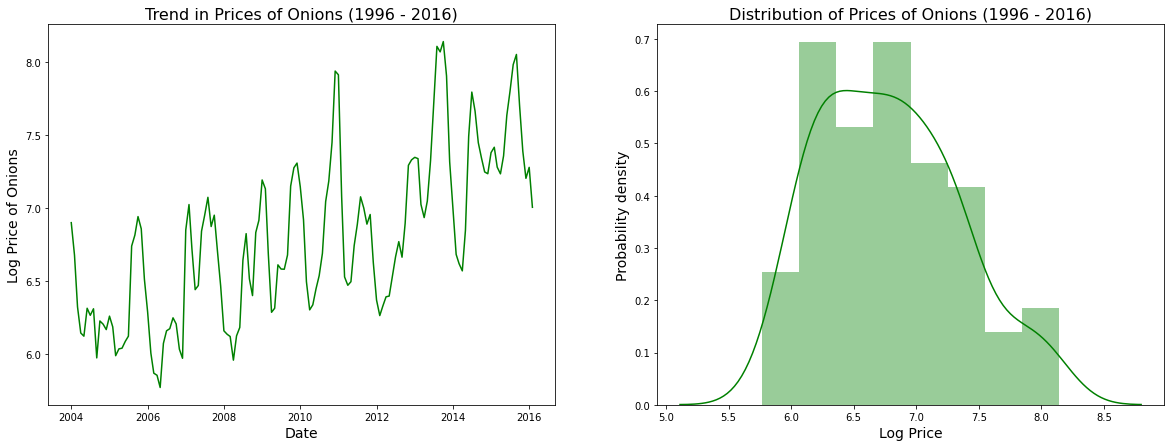

In [ ]:
trend_dist()

---

**<h4>Question 7:** Perform Rolling Statistics as well as Augmented Dickey-Fuller Test over the log_indexed_data and priceMod features.

---

- Create a function that shows side by side comparison of Rolling Statistics of priceMod.

In [ ]:
def roll_stats():
  # Plotting Rolling Statistics over Observed Data
  figure = plt.figure(figsize = [20, 7])

  plt.subplot(1, 2, 1)

  # Plot Without Transformation
  rolling_means(indexed_data_BANGLORE, feature = 'priceMod', title_add = ' [ Original ]')

  plt.subplot(1, 2, 2)

  # Plot With Log Transformation
  rolling_means(log_indexed_data, feature = 'priceMod', title_add = ' [ Log Transformed ]')

  # Plot the Visual
  plt.show()

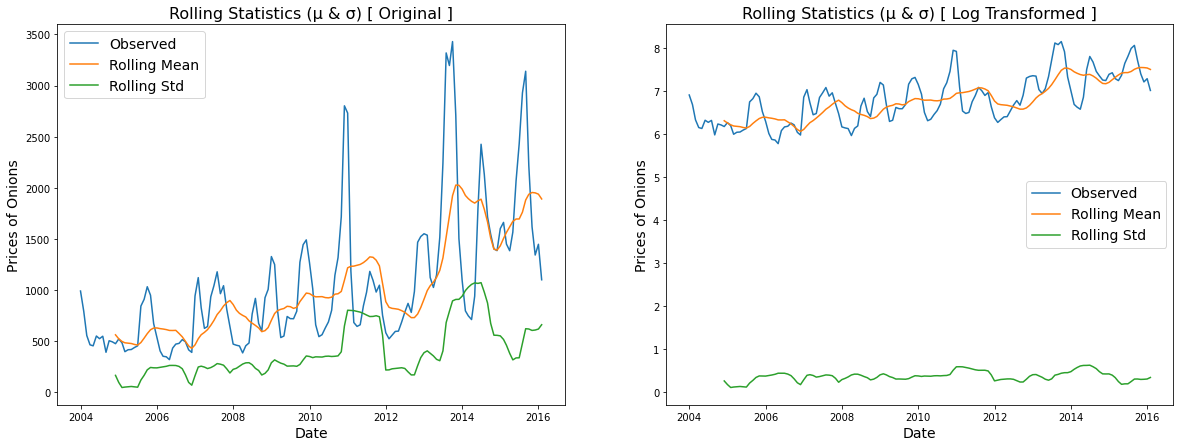

In [ ]:
roll_stats()

- Call Augmented Dickey Fuller Test function that was created earlier over original indexed_data_BANGLORE dataframe.

In [ ]:
ADFTest(indexed_data_BANGLORE, feature = 'priceMod', test_label = 'Original')

,ADF_Test_Statistics,p-value,Used_Lags,Number_Of_Observations,Critical_Value (1%),Critical_Value (5%),Critical_Value (10%)
Original,-4.00440,0.00139,2,143,-3.47693,-2.88197,-2.57767


- Call Augmented Dickey Fuller Test function that was created earlier over log transformed indexed_data_BANGLORE dataframe.

In [ ]:
ADFTest(log_indexed_data, feature = 'priceMod', test_label = 'Log Transformed')

,ADF_Test_Statistics,p-value,Used_Lags,Number_Of_Observations,Critical_Value (1%),Critical_Value (5%),Critical_Value (10%)
Log Transformed,-3.65064,0.00486,2,143,-3.47693,-2.88197,-2.57767


---

**<h4>Question 8:** Perform time shift transformation over log_indexed_data dataframe by using following operations.

---

- Take a difference of log_indexed_data and shifted log_indexed_data by periods = 1 and store inside shift_indexed_data.

- Drop all the null values by using dropna function.

In [ ]:
def shiftTransform():
  # Creating a new feature named as shiftLogPriceMod
  shift_indexed_data = log_indexed_data - log_indexed_data.shift(periods = 1)

  # Remove NAN values
  shift_indexed_data.dropna(inplace = True)
  return shift_indexed_data

In [ ]:
shift_indexed_data = shiftTransform()
shift_indexed_data.head()

- Plot a scatterplot between shifted log_indexed_data by periods = 1 and log_indexed_data.

In [ ]:
def plot_scatter():
  # Creating a scatterplot of shiftLogPriceMod with respect to logPriceMod feature
  figure = plt.figure(figsize = [15, 7])

  sns.scatterplot(x = shift_indexed_data['priceMod'], y = log_indexed_data['priceMod'])
  plt.xlabel('shiftLogPriceMod', size = 14)
  plt.ylabel('logPriceMod', size = 14)
  plt.title('Scatterplot of Prices of Onions (1996 - 2016)', size = 16)

  plt.show()

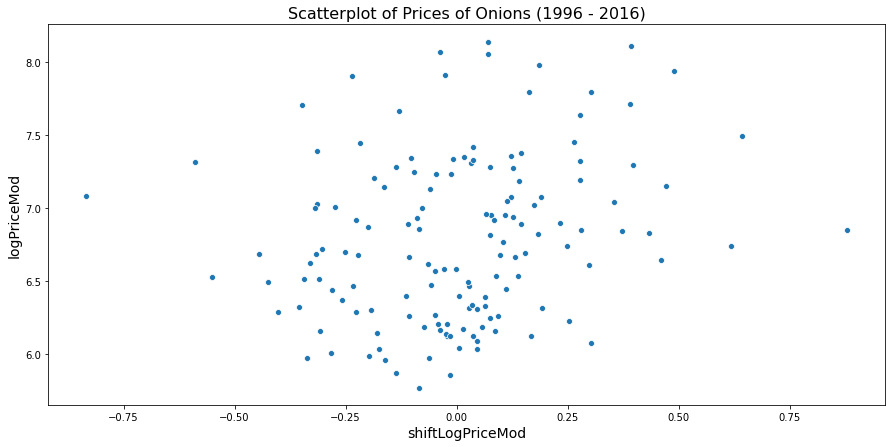

In [ ]:
plot_scatter()

---

**<h4>Question 9:** Perform Rolling Statistics as well as Augmented Dickey-Fuller Test over the shift_indexed_data and priceMod features.

---

- Create a function that shows side by side comparison of Rolling Statistics of priceMod.

In [ ]:
def roll_stats():
  # Plotting Rolling Statistics over Observed Data
  figure = plt.figure(figsize = [20, 7])

  plt.subplot(1, 2, 1)

  # Plot Without Transformation
  rolling_means(indexed_data_BANGLORE, feature = 'priceMod', title_add = ' [ Original ]')

  plt.subplot(1, 2, 2)

  # Plot With Log Transformation
  rolling_means(shift_indexed_data, feature = 'priceMod', title_add = ' [ Log Shift Transformed ]')

  # Plot the Visual
  plt.show()

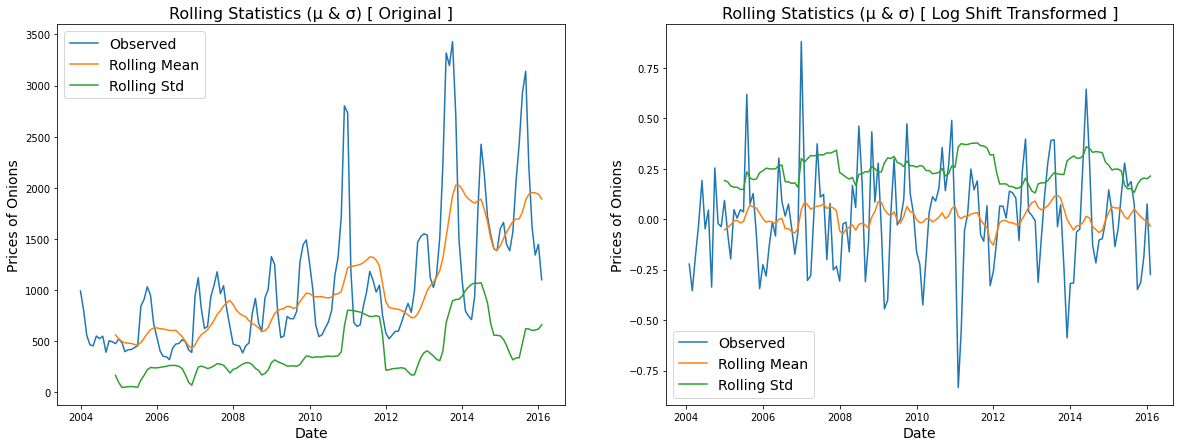

In [ ]:
roll_stats()

- Call Augmented Dickey Fuller Test function that was created earlier over original indexed_data_BANGLORE dataframe.

In [ ]:
ADFTest(indexed_data_BANGLORE, feature = 'priceMod', test_label = 'Original')

,ADF_Test_Statistics,p-value,Used_Lags,Number_Of_Observations,Critical_Value (1%),Critical_Value (5%),Critical_Value (10%)
Original,-4.00440,0.00139,2,143,-3.47693,-2.88197,-2.57767


- Call Augmented Dickey Fuller Test function that was created earlier over shift_indexed_data dataframe.

In [ ]:
ADFTest(shift_indexed_data, feature = 'priceMod', test_label = 'Shift Transformed')

,ADF_Test_Statistics,p-value,Used_Lags,Number_Of_Observations,Critical_Value (1%),Critical_Value (5%),Critical_Value (10%)
Shift Transformed,-7.29325,0.00000,7,137,-3.47901,-2.88288,-2.57815


<a name = Section7></a>

---
# **7. Time Series Forecasting**
---

---

**<h4>Question 10:** Estimate p and q from autocorrelation and partial autocorrelation function defined in statsmodel.

---

- Create two variables named as <ins>ACF</ins> and <ins>PACF</ins> to estimate acf() and pacf() using lags = 20.

- Create a dataframe named as <ins>corrFrame</ins> using ACF and PACF variables.

In [ ]:
def autoPartialCorrFrame():
  # Estimating Autocorrelation Function
  ACF = acf(shift_indexed_data, nlags = 20)

  # Estimating Partial Autocorrelation Function
  PACF = pacf(shift_indexed_data, nlags = 20)

  # Preparing a dataframe out of Correlation Arrays
  corrFrame = pd.DataFrame(data = {'ACF': ACF, 'PACF': PACF})

  return corrFrame

In [ ]:
corrFrame = autoPartialCorrFrame()

- Create two subplots and plot autocorrelation and partial autocorrelation functions simulatneously.

In [ ]:
def autoCorr_partialAutoCorr():
  fig, (axes1, axes2) = plt.subplots(nrows = 1, ncols = 2, sharex = False, figsize = (20, 7))

  plot_acf(shift_indexed_data, lags = 20, ax = axes1)
  sns.lineplot(x = corrFrame.index, y = 'ACF', data = corrFrame, ax = axes1)
  axes1.set_xlabel(xlabel = 'Lags', size = 14)
  axes1.set_ylabel(ylabel = 'Correlation', size = 14)
  axes1.set_title(label = 'Autocorrelation Function', size = 16)
  axes1.legend(labels = ['No Correlation', 'Correlation Value', 'Value Connector','Verticle Line', 'Confidence Interval'], prop = {'size': 12})
  axes1.set_xticks(ticks = range(0, 21, 1))
  axes1.set_yticks(ticks = np.linspace(start = -1, stop = 1, num = 21))
  axes1.grid(b = True, which = 'both')

  plot_pacf(shift_indexed_data, lags = 20, ax = axes2)
  sns.lineplot(x = corrFrame.index, y = 'PACF', data = corrFrame, ax = axes2)
  axes2.set_xlabel(xlabel = 'Lags', size = 14)
  axes2.set_ylabel(ylabel = 'Correlation', size = 14)
  axes2.set_title(label = 'Partial Autocorrelation Function', size = 16)
  axes2.legend(labels = ['No Correlation', 'Correlation Value', 'Value Connector', 'Verticle Line', 'Confidence Interval'], prop = {'size': 12})
  axes2.set_xticks(ticks = range(0, 21, 1))
  axes2.set_yticks(ticks = np.linspace(start = -1, stop = 1, num = 21))
  axes2.grid(b = True, which = 'both')

  plt.show()

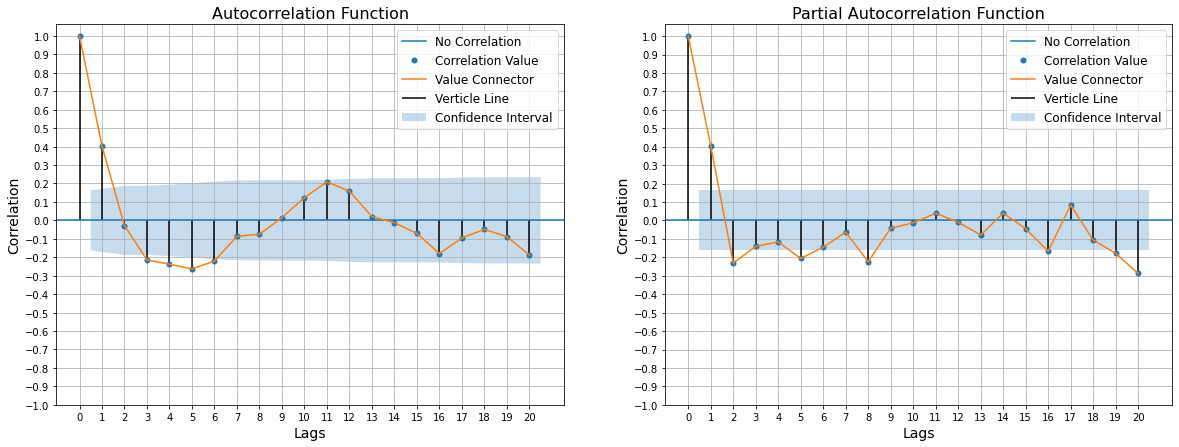

In [ ]:
autoCorr_partialAutoCorr()

- On analyzing above plots we came to conclusion of using p = 2, d = 0 and q = 1.

---

**<h4>Question 11:** Create a function named as <ins>actual_vs_predicted</ins> to evaluate ARIMA model later on.

---

- Plot line plot and scatterplot taking input parameters.

- Add a model evaluation metric which will estimate RSS over the data.

- Set the RSS over the title to visualize the comparision.

In [ ]:
def actual_vs_predicted(actual_data, predicted_data, title):

  # Plotting Actual Data
  sns.lineplot(x = actual_data.index, y = actual_data.values.flatten())
  sns.scatterplot(x = actual_data.index, y = actual_data.values.flatten())

  # Plotting Predicted Data
  sns.lineplot(x = predicted_data.index, y = predicted_data.values)
  sns.scatterplot(x = predicted_data.index, y = predicted_data.values)

  # Estimating RSS
  rss_value = np.sum(np.square(actual_data.values - predicted_data.values))

  # Modifying formatting
  plt.xlabel(xlabel = 'Date', size = 14)
  plt.ylabel(ylabel = 'Prices of Onions', size = 14)
  plt.title(label = title +' [RSS = {:.4f}]'.format(rss_value), size = 16)
  plt.legend(labels = ['Actual', 'Predicted'])
  plt.grid(b = True, which = 'both')

---

**<h4>Question 12:** Execute ARIMA model with the identified p, d and q value from earlier analysis and evaluate the model.

---

- Create a function that returns ARIMA and model fit.

- Create an object of ARIMA model inside function by passing shift_indexed_data with order = [2, 0, 1]

In [ ]:
def arimaModel():
  model = ARIMA(shift_indexed_data ,order = (2, 0, 1))
  model_fit = model.fit()
  print('-----------------------------------------------------------------------')
  print('Coefficients:')
  print(model_fit.params)
  print('-----------------------------------------------------------------------')
  return model, model_fit

- Print the model parameters and plot the actual vs predicted values over the data.

In [ ]:
model, model_fit = arimaModel()

-----------------------------------------------------------------------
Coefficients:
const     0.00882
ar.L1     1.26071
ar.L2    -0.54942
ma.L1    -0.99990
sigma2    0.03902
dtype: float64
-----------------------------------------------------------------------


- Evaluate the model by plotting side by side comparison of actual and predicted data.

In [ ]:
def evalModel():
  figure = plt.figure(figsize = [20, 7])

  actual_vs_predicted(shift_indexed_data, model_fit.fittedvalues, title = 'Actual Vs Predicted')

  plt.show()

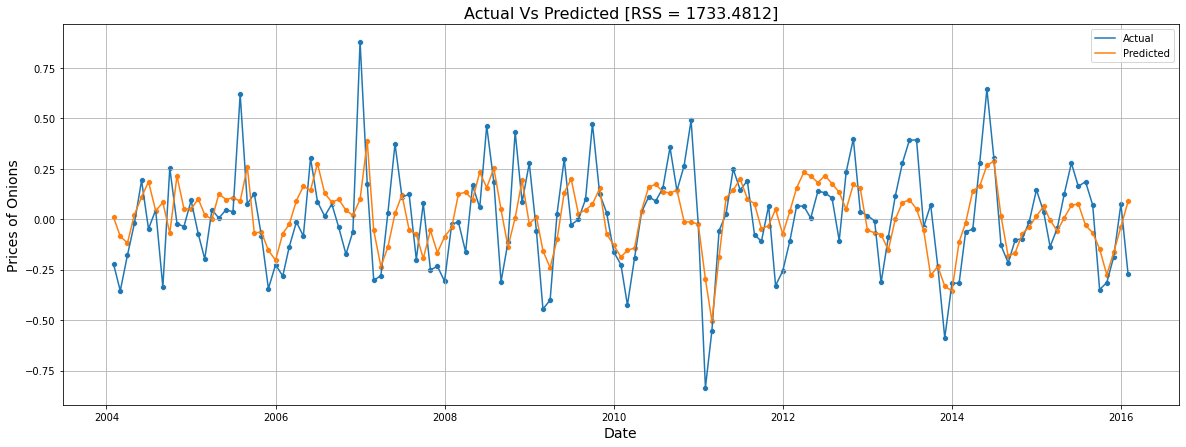

In [ ]:
evalModel()

---

**<h4>Question 13:** Perform the reverse transformation over the estimated values from the model.

---

- Create a dataframe named as <ins>reverse_diff_data</ins> having first value of original column i.e. priceMod.

- Add the cummulative sum over model_fit fitted values with the dataframe named as <ins>reverse_diff_data</ins>.

- Then assign back the first value of original feature to the first value of reverse_diff_data.

- Finally return reverse_diff_data dataframe.

In [ ]:
def reverseTransform():
  reverse_diff_data = pd.DataFrame(data = log_indexed_data['priceMod'][0], index = log_indexed_data.index, columns = ['priceMod'])

  # Adding first month value to each row
  reverse_diff_data['priceMod'] = reverse_diff_data['priceMod'] + model_fit.fittedvalues.cumsum()

  # Adding the fist month back to complete the reverse differncing 
  reverse_diff_data.iloc[0] = log_indexed_data['priceMod'][0]

  # Return reversed differenced data
  return reverse_diff_data

- Call reverse_diff_data in a reverse_diff_data variable and plot first five values using .head()

In [ ]:
reverse_diff_data = reverseTransform()
reverse_diff_data.head()

,priceMod
date,
2004-01-01,6.89871
2004-02-01,6.90753
2004-03-01,6.82250
2004-04-01,6.70438
2004-05-01,6.72545


---

**<h4>Question 14:** Perform exponential transformation over reverse_diff_data and view first five data points.

---

In [ ]:
def inverseShift():
  # Performing Inverse Transformation
  return np.exp(reverse_diff_data)

In [ ]:
inverse_log_data = inverseShift()
inverse_log_data.head()

,priceMod
date,
2004-01-01,991.00000
2004-02-01,999.77843
2004-03-01,918.27351
2004-04-01,815.97279
2004-05-01,833.34993



- Plot the actual values and predicted values to original scale.

In [ ]:
def plotReverseTransData():
  # Plotting original scale values of actual and predicted
  figure = plt.figure(figsize = [20, 7])
  sns.lineplot(x = inverse_log_data.index, y = 'priceMod', data = inverse_log_data)
  sns.lineplot(x = indexed_data_BANGLORE.index, y = 'priceMod', data = indexed_data_BANGLORE)
  plt.xlabel('Date', size = 14)
  plt.ylabel('Prices of Onions', size = 14)
  plt.title(label = 'Actual Data Vs Predicted Data', size = 16)
  plt.legend(labels = ['Actual Data', 'Predicted Data'], prop = {'size': 12})
  plt.grid(b = True, which = 'both')
  plt.show()

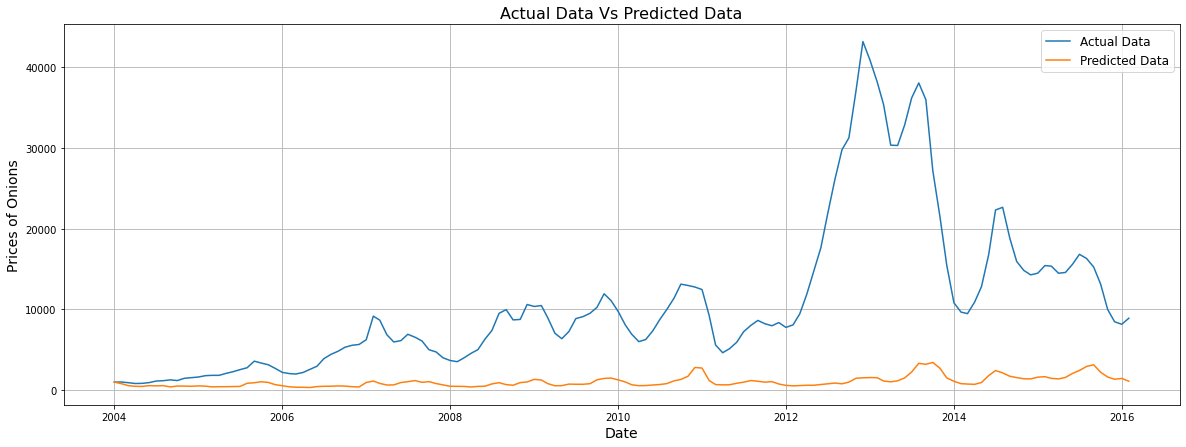

In [ ]:
plotReverseTransData()